# Ejercicio 2 - Clasificación de textos

## Importar las librerías necesarias

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import string
import unicodedata

## Cargar el dataset

In [2]:
dataset = pd.read_csv('/content/topic_classification_complete_process1.csv')

## **Tarea 2a**: Realiza una descripción del dataset.

### Mostrar parte del dataset

Mostramos parte del dataset para ver su contenido y forma

In [3]:
dataset.head()

,label,content
0,Emotion,Im struggling to understand how I feel about s...
1,Financial,NEW: Modis promise to ban plastic straws this ...
2,Financial,SURVEY: Middle-Income Americans Spending Less ...
3,Financial,WATCH: Wall Street ended lower after bank stoc...
4,Financial,Someone selling a ton of $SE puts to open Sep ...


### Análisis de las etiquetas

Al ver que son textos con su correspondiente tópico, analizamos el dataset para sacar todos los tópicos existentes.

In [4]:
print("Labels (etiquetas) únicas en el dataset:")
print(dataset['label'].unique())

Labels (etiquetas) únicas en el dataset:
['Emotion' 'Financial' 'Politics' 'Sport' 'Health' 'Science']


### Preprocesamiento del texto

#### Asegurar que todos los valores en 'content' sean cadenas y reemplazar NaN con cadenas vacías

In [5]:
dataset['content'] = dataset['content'].astype(str).fillna('')

#### Función de preprocesamiento de texto

En esta función procesamos el texto:

* Eliminar caracteres no ASCII
* Convertir a minúsculas
* Eliminar puntuación
* Eliminar espacios adicionales

In [6]:
def preprocess_text(text):
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

dataset['content'] = dataset['content'].apply(preprocess_text)

### Visualización de palabras más comunes por tópico

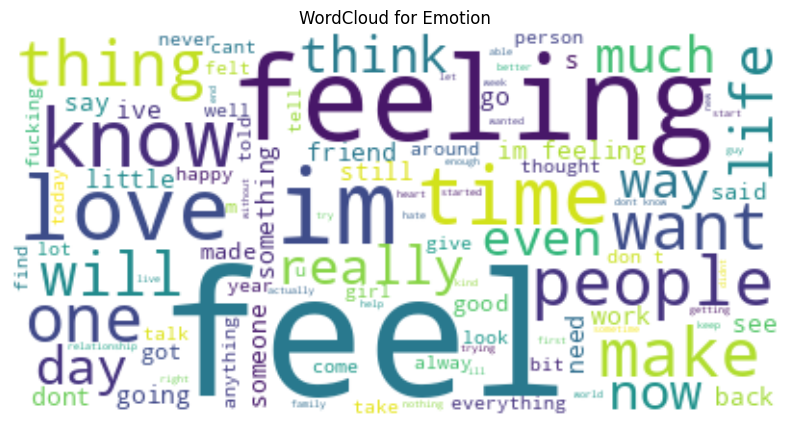

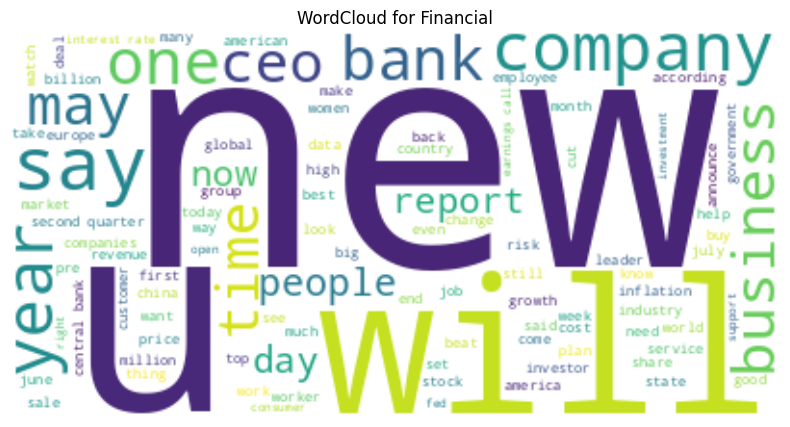

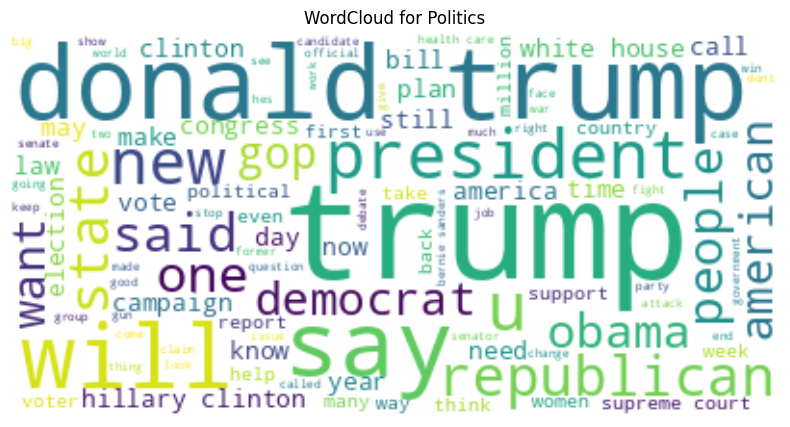

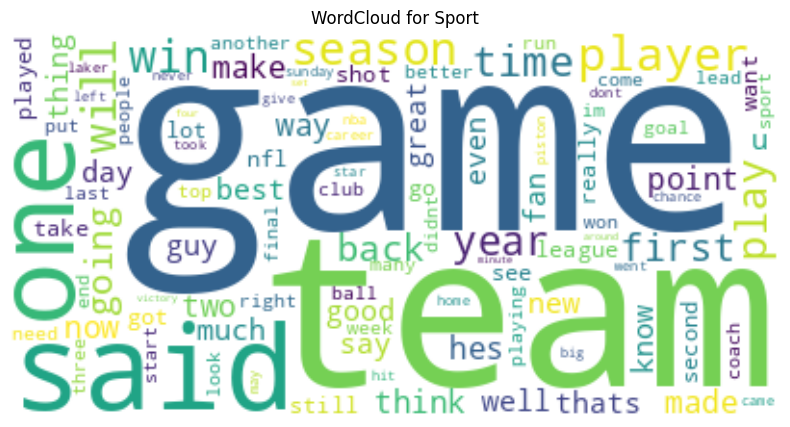

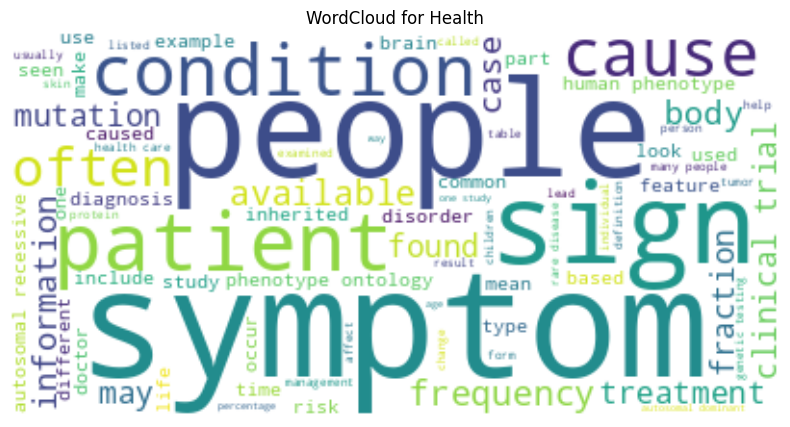

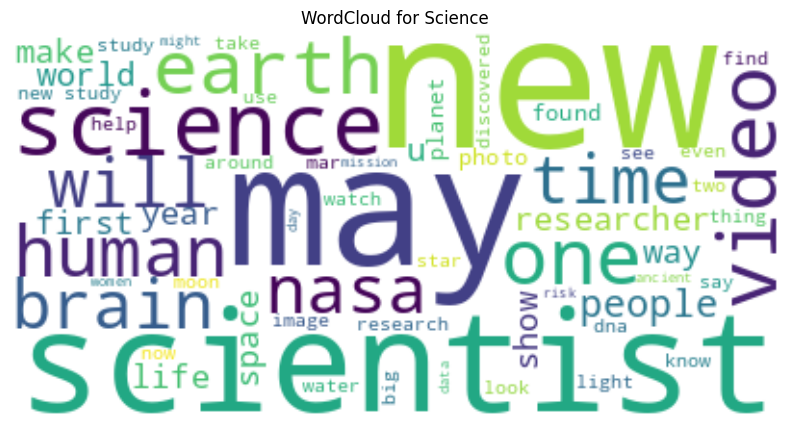

In [7]:
def plot_wordcloud(data, label):
    text = " ".join(text for text in data[data['label'] == label]['content'])
    wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {label}')
    plt.show()


for label in dataset['label'].unique():
    plot_wordcloud(dataset, label)

## **Tarea 2b**. Realiza los pasos necesarios para generar una o varias representaciones de los textos

### Representación de los textos usando TF-IDF

Seleccionamos solo las 4000 palabras más significativas escogiendo así una porción del dataset.

In [8]:
tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(dataset['content']).toarray()
y = dataset['label']

## **Tarea 2c**: Entrega y evalúa al menos 2 algoritmos de clasificación

### Dividir en conjuntos de entrenamiento y prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento y evaluación de algoritmos de clasificación

#### Naive Bayes

In [10]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", nb_accuracy)

Naive Bayes Classification Report
              precision    recall  f1-score   support

     Emotion       0.76      0.93      0.84      5577
   Financial       0.85      0.73      0.78      4599
      Health       0.87      0.78      0.82      7473
    Politics       0.78      0.93      0.85      7602
     Science       0.84      0.18      0.30       926
       Sport       0.89      0.57      0.69      1184

    accuracy                           0.81     27361
   macro avg       0.83      0.69      0.71     27361
weighted avg       0.82      0.81      0.80     27361

Accuracy: 0.8132743686268776


##### Matriz de confusión para Naive Bayes

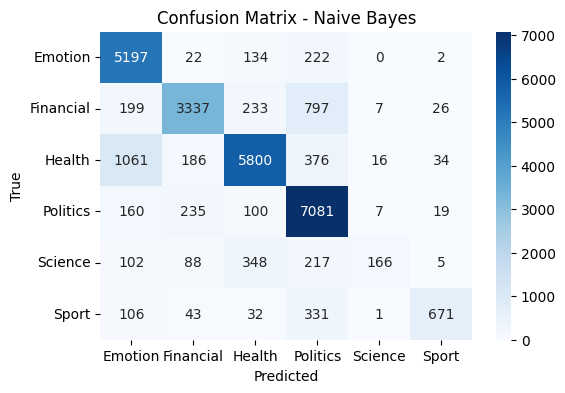

In [11]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

#### SVM

En concreto elegimos LinearSVC

In [12]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", svm_accuracy)


SVM Classification Report
              precision    recall  f1-score   support

     Emotion       0.89      0.93      0.91      5577
   Financial       0.82      0.80      0.81      4599
      Health       0.88      0.90      0.89      7473
    Politics       0.88      0.90      0.89      7602
     Science       0.64      0.38      0.48       926
       Sport       0.83      0.72      0.77      1184

    accuracy                           0.86     27361
   macro avg       0.82      0.77      0.79     27361
weighted avg       0.86      0.86      0.86     27361

Accuracy: 0.86414970213077


##### Matriz de confusión para SVM

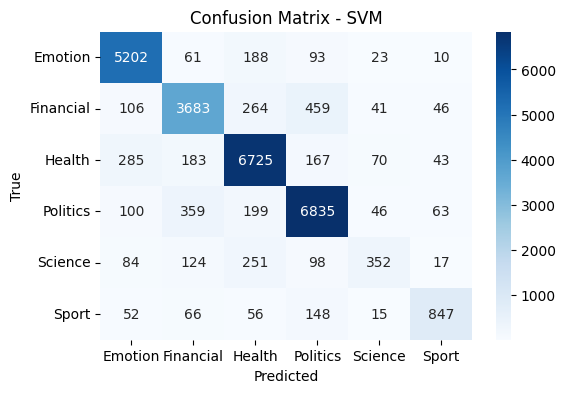

In [13]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()


### Comparación de los modelos

Como podemos observar la SVM es más precisa que Naive Bayes

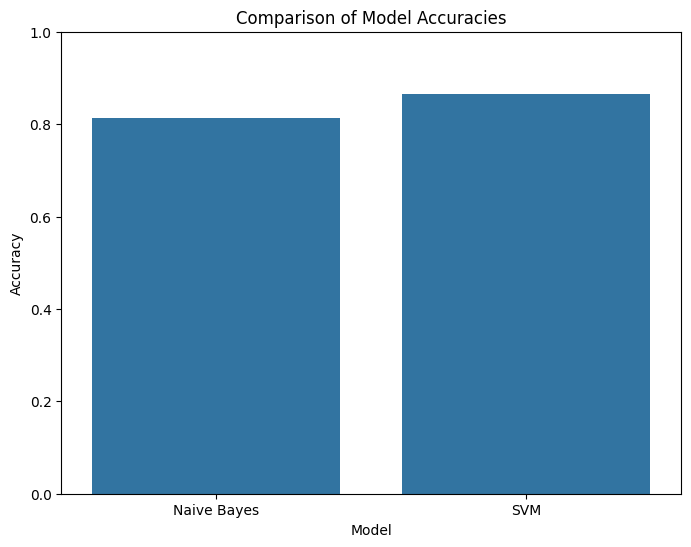

In [14]:
models = ['Naive Bayes', 'SVM']
accuracies = [nb_accuracy, svm_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
